# Check CICE issue with Sinz, Tinz
https://github.com/COSIMA/cice5/issues/62

In [1]:
%matplotlib inline
import cosima_cookbook as cc
from cosima_cookbook import explore
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from matplotlib import cm
import os.path
import glob

In [2]:
import climtas.nci
climtas.nci.GadiClient(malloc_trim_threshold='64kib')

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 16
Total threads: 16,Total memory: 64.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:34467,Workers: 16
Dashboard: /proxy/8787/status,Total threads: 16
Started: Just now,Total memory: 64.00 GiB
Comm: tcp://127.0.0.1:39697,Total threads: 1
Dashboard: /proxy/35457/status,Memory: 4.00 GiB
Nanny: tcp://127.0.0.1:38123,


In [3]:
session = cc.database.create_session()

In [4]:
dbx = explore.DatabaseExplorer(session=session)
dbx

DatabaseExplorer(children=(HTML(value='<style>.header p{ line-height: 1.4; margin-bottom: 10px }</style>\n    …

## Check S and T profiles in cycle 4

In [41]:
sinzall = cc.querying.getvar('01deg_jra55v140_iaf_cycle4', 'Sinz_m', session)

In [42]:
sinzall.shape # NB: time axis present

(23, 5, 4, 2700, 3600)

In [5]:
sinz = cc.querying.getvar('01deg_jra55v140_iaf_cycle4', 'Sinz_m', session, n=-1)

In [34]:
tinz = cc.querying.getvar('01deg_jra55v140_iaf_cycle4', 'Tinz_m', session, n=-1)

In [6]:
sinz.shape

(1, 5, 4, 2700, 3600)

In [35]:
tinz.shape

(1, 5, 4, 2700, 3600)

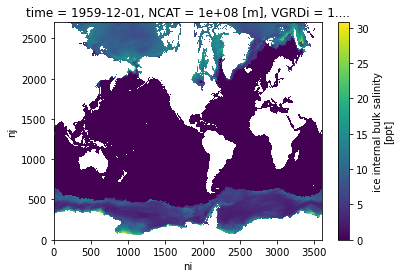

In [8]:
sinz.isel(time=0,nc=4,nkice=0).plot()

Text(0, 0.5, 'Salinity')

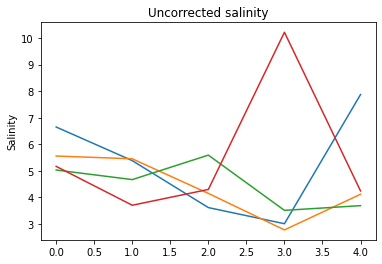

In [69]:
s = sinz.isel(time=0, ni=999, nj=2699).values
plt.plot(s)
plt.title('Uncorrected salinity')
plt.ylabel('Salinity')

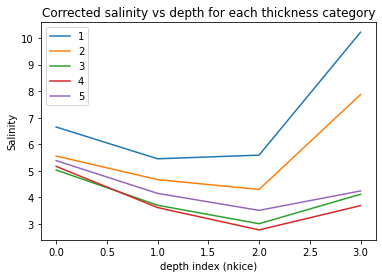

In [70]:
plt.plot(s.reshape((4,5)), label=['1','2','3','4','5'])
plt.title('Corrected salinity vs depth for each thickness category')
plt.ylabel('Salinity')
plt.xlabel('depth index (nkice)')
plt.legend()

Text(0, 0.5, 'Salinity')

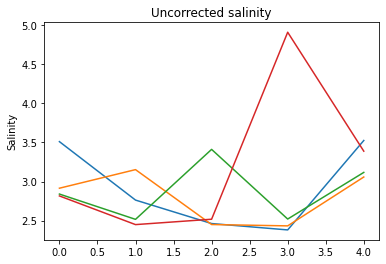

In [71]:
s = sinz.isel(time=0).mean('ni').mean('nj').values
plt.plot(s)
plt.title('Uncorrected salinity')
plt.ylabel('Salinity')

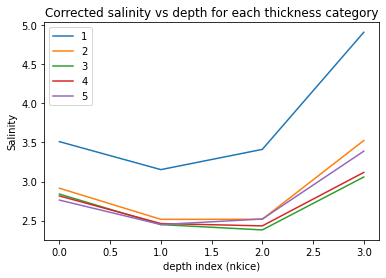

In [72]:
plt.plot(s.reshape((4,5)), label=['1','2','3','4','5'])
plt.title('Corrected salinity vs depth for each thickness category')
plt.ylabel('Salinity')
plt.xlabel('depth index (nkice)')
plt.legend()

Text(0, 0.5, 'Temperature')

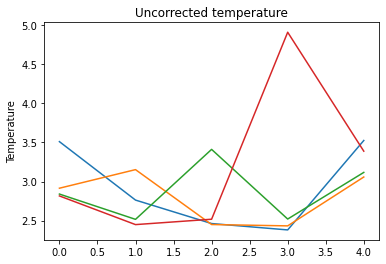

In [73]:
t = tinz.isel(time=0, ni=999, nj=2699).values
plt.plot(s)
plt.title('Uncorrected temperature')
plt.ylabel('Temperature')

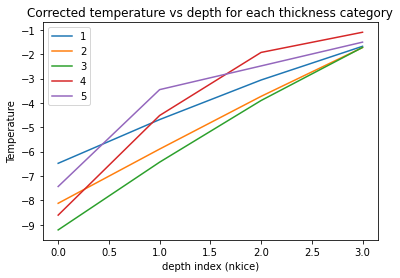

In [74]:
plt.plot(t.reshape((4,5)), label=['1','2','3','4','5'])
plt.title('Corrected temperature vs depth for each thickness category')
plt.ylabel('Temperature')
plt.xlabel('depth index (nkice)')
plt.legend()

Text(0, 0.5, 'Temperature')

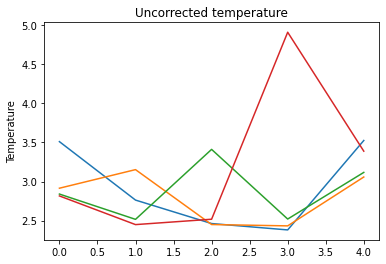

In [75]:
t = tinz.isel(time=0).mean('ni').mean('nj').values
plt.plot(s)
plt.title('Uncorrected temperature')
plt.ylabel('Temperature')

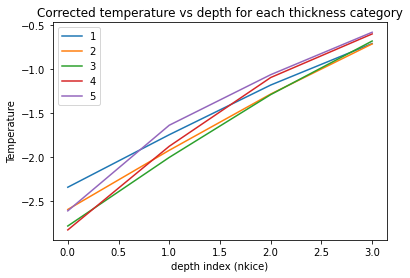

In [76]:
plt.plot(t.reshape((4,5)), label=['1','2','3','4','5'])
plt.title('Corrected temperature vs depth for each thickness category')
plt.ylabel('Temperature')
plt.xlabel('depth index (nkice)')
plt.legend()

## check cycle 3

In [10]:
sinz = cc.querying.getvar('01deg_jra55v140_iaf_cycle3', 'Sinz_m', session, n=-1)

In [11]:
sinz

<xarray.DataArray 'Sinz_m' (time: 1, nc: 5, nkice: 4, nj: 2700, ni: 3600)>
dask.array<open_dataset-8221090429c512cbb95edba0f9f7a68eSinz_m, shape=(1, 5, 4, 2700, 3600), dtype=float32, chunksize=(1, 1, 1, 270, 360), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2019-01-01
    TLON     (nj, ni) float32 dask.array<chunksize=(270, 360), meta=np.ndarray>
    TLAT     (nj, ni) float32 dask.array<chunksize=(270, 360), meta=np.ndarray>
    ULON     (nj, ni) float32 dask.array<chunksize=(270, 360), meta=np.ndarray>
    ULAT     (nj, ni) float32 dask.array<chunksize=(270, 360), meta=np.ndarray>
    NCAT     (nc) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    VGRDi    (nkice) float32 dask.array<chunksize=(1,), meta=np.ndarray>
Dimensions without coordinates: nc, nkice, nj, ni
Attributes:
    units:          ppt
    long_name:      ice internal bulk salinity
    cell_measures:  area: tarea
    cell_methods:   time: mean
    time_rep:       averaged
    time_bounds:    <xarray.DataArray 'time_bounds' (time: 1, d2: 2)>\ndask.a...
    ncfiles:        ['/g/data/cj50/access-om2/raw-output/access-om2-01/01deg_...
    contact:        Andrew Kiss
    email:          andrew.kiss@anu.edu.au
    created:        2020-11-11
    description:    0.1 degree ACCESS-OM2 global model configuration under in...
    notes:          Run configuration and history: https://github.com/COSIMA/...

In [12]:
sinz.shape

(1, 5, 4, 2700, 3600)

In [24]:
sinz.isel(time=0,ni=0,nj=490).values

array([[8.907124 , 6.9726076, 5.9118047, 5.959202 ],
       [6.79212  , 7.201125 , 4.9755616, 4.467157 ],
       [4.8251762, 5.4950786, 6.034988 , 3.9300387],
       [3.7013698, 4.092709 , 4.8782053, 5.274409 ],
       [3.4740565, 3.3992057, 3.994407 , 5.3925915]], dtype=float32)

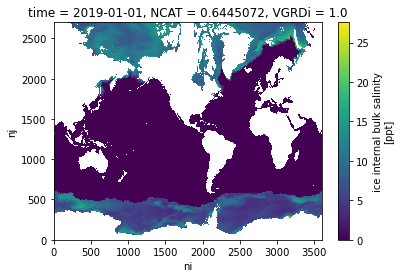

In [21]:
sinz.isel(time=0,nc=0,nkice=0).plot()

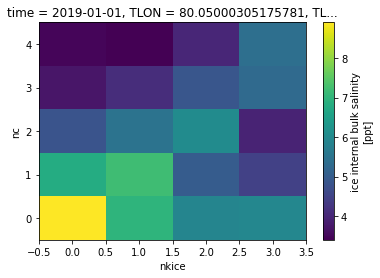

In [32]:
sinz.isel(time=0,ni=0,nj=490).plot()

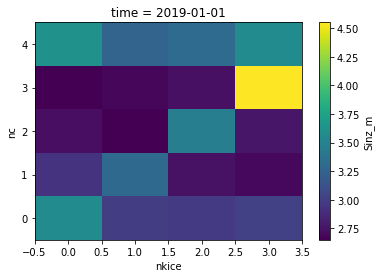

In [35]:
sinz.isel(time=0).mean('ni').mean('nj').plot()

In [49]:
ds = xr.open_dataset('/home/548/sxa548/access-om2-sample_output/iceh.2018-08-15.nc')
badsinz = ds['Sinz']
badvicen = ds['vicen']

In [50]:
badsinz.dims

('time', 'nc', 'nkice', 'nj', 'ni')

In [51]:
badsinz.shape

(1, 5, 4, 300, 360)

In [52]:
badsinz.isel(time=0,ni=30,nj=40,nc=0).values

array([0.64920187, 0.64920187, 0.64920187, 0.64920187], dtype=float32)

In [26]:
badsinz.isel(time=0,ni=30,nj=40).values

array([[0.64920187, 0.64920187, 0.64920187, 0.64920187],
       [0.64920187, 2.354581  , 2.354581  , 2.354581  ],
       [2.354581  , 2.354581  , 3.0310922 , 3.0310922 ],
       [3.0310922 , 3.0310922 , 3.0310922 , 3.1892977 ],
       [3.1892977 , 3.1892977 , 3.1892977 , 3.1892977 ]], dtype=float32)

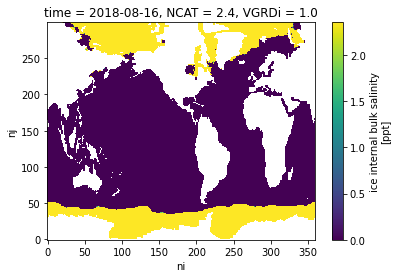

In [29]:
badsinz.isel(time=0,nc=2,nkice=0).plot()

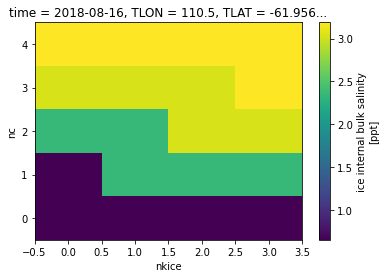

In [31]:
badsinz.isel(time=0,ni=30,nj=40).plot()

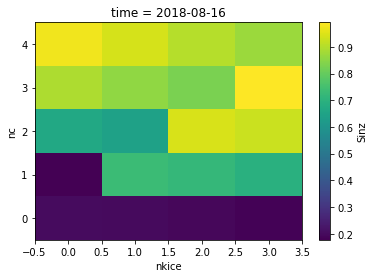

In [36]:
badsinz.isel(time=0).mean('ni').mean('nj').plot()

## Check if concatenation caused a problem with cycle 2

In [29]:
# pre-concatenation file
ds = xr.open_dataset('/scratch/x77/aek156/access-om2/archive/01deg_jra55v140_iaf_cycle2/output469/ice/OUTPUT/iceh.2014-05-01.nc-DELETE')
badsinz = ds['Sinz']
badtinz = ds['Tinz']
badvicen = ds['vicen']

In [10]:
# time dimension missing in cycle 2 prior to concatenation 
badsinz.dims

('nc', 'nkice', 'nj', 'ni')

In [28]:
# time dimension missing in cycle 2 prior to concatenation 
badtinz.dims

('nc', 'nkice', 'nj', 'ni')

In [45]:
badvicen.dims

('time', 'nc', 'nj', 'ni')

In [14]:
badsinz.shape

(5, 4, 2700, 3600)

In [15]:
badsinz.isel(ni=0,nj=490).values

array([[4.1596556, 4.0362782, 3.9408708, 3.8681846],
       [4.6946874, 4.5080795, 4.35641  , 4.249035 ],
       [4.8996577, 4.6506667, 4.436838 , 4.2928767],
       [5.0298223, 4.7225137, 4.4583774, 4.2983594],
       [0.       , 0.       , 0.       , 0.       ]], dtype=float32)

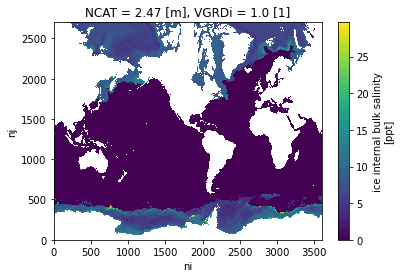

In [12]:
badsinz.isel(nc=2,nkice=0).plot()

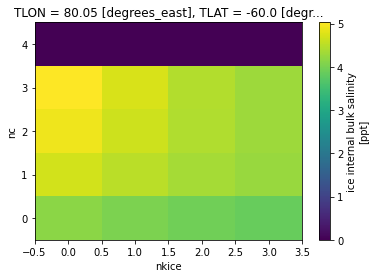

In [43]:
badsinz.isel(ni=0,nj=490).plot()

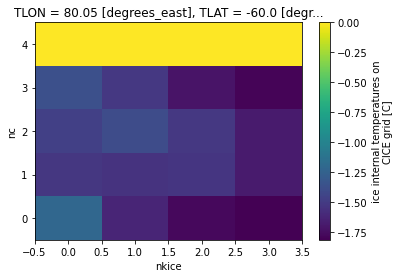

In [31]:
badtinz.isel(ni=0,nj=490).plot()

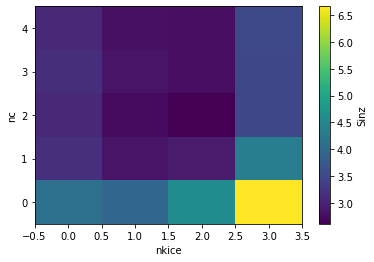

In [17]:
badsinz.mean('ni').mean('nj').plot()

In [18]:
# concatenated file
ds = xr.open_dataset('/g/data/cj50/access-om2/raw-output/access-om2-01/01deg_jra55v140_iaf_cycle2/output469/ice/OUTPUT/iceh.2014-05-daily.nc')
badsinz = ds['Sinz']
badvicen = ds['vicen']

In [19]:
# time dimension missing in cycle 2 prior to concatenation, so data was lost
badsinz.dims

('nc', 'nkice', 'nj', 'ni')

In [20]:
badsinz.shape

(5, 4, 2700, 3600)

In [21]:
badsinz.isel(ni=0,nj=490).values

array([[4.1596556, 4.0362782, 3.9408708, 3.8681846],
       [4.6946874, 4.5080795, 4.35641  , 4.249035 ],
       [4.8996577, 4.6506667, 4.436838 , 4.2928767],
       [5.0298223, 4.7225137, 4.4583774, 4.2983594],
       [0.       , 0.       , 0.       , 0.       ]], dtype=float32)

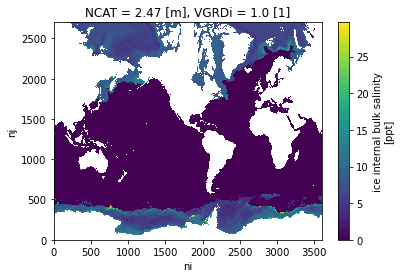

In [22]:
badsinz.isel(nc=2,nkice=0).plot()

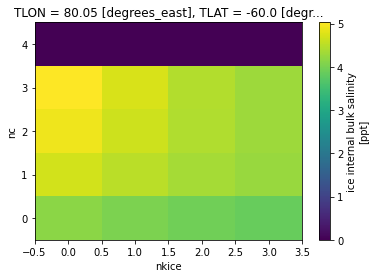

In [38]:
badsinz.isel(ni=0,nj=490).plot()

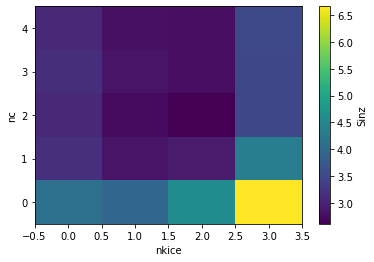

In [39]:
badsinz.mean('ni').mean('nj').plot()